In [4]:
####notebook is used to graph correlation function and polarization maps#### 
%run ../../../functions/graphing_func.py ##imports np, matplotlib, cross_spectra, correlation
                                         ##plot functions --- plot_map, plot_power, plot_corr

In [27]:
def power_spectra(QU, npix=512, map_size=20,bin_size=801,bin_interval=40):
    #Transforming from real space(RS) to Fourier space(FS) using 2-d Fourier Transform,
    #A factor of(np.pi*(npix**2)) is needed
    Q = QU[:,:,0]
    U = QU[:,:,1]
    QN = np.fft.fftshift(np.fft.fft2(Q))/(np.pi*(npix**2))
    UN = np.fft.fftshift(np.fft.fft2(U))/(np.pi*(npix**2))
    
    #define Fourier plane coordinates
    dl = 2.0*np.pi / np.radians(map_size)
    lx = np.outer(np.ones(npix),np.arange(-npix/2,npix/2)*dl)
    ly = np.transpose(lx)
    l = np.sqrt(lx**2+ly**2)
    phi = np.arctan2(ly,lx)
    phi[l == 0] = 0.0
    
    #Inverted rotation matrix 
    #line segments of E and B mode are symmetric over pi radians
    E = QN*np.cos(2*phi) + UN*np.sin(2*phi)
    B =-QN*np.sin(2*phi) + UN*np.cos(2*phi)
    
    #apply conjugate and doing operation to convert Cl to Dl
    EE=np.real(np.conj(E)*E)*(l*(l+1))/(2*np.pi)
    BB=np.real(np.conj(B)*B)*(l*(l+1))/(2*np.pi)
    EB=np.real(np.conj(E)*B)*(l*(l+1))/(2*np.pi)
    
    #define bin.. goes from {0,1,2,...,bin_size} in steps of bin_interval
    bin_edge = np.arange(0, bin_size, bin_interval)
    
    #Create list of zeros filled in with mean values calculated in for loop
    DlEE = np.zeros(len(bin_edge)-1)
    DlBB = np.zeros(len(bin_edge)-1)
    DlEB = np.zeros(len(bin_edge)-1)
    
    #finding mean at values of l for all types of spectra
    for i in range(len(DlEE)):
        DlEE[i]=np.mean(EE[(l>=bin_edge[i]) & (l<bin_edge[i+1])])
        DlBB[i]=np.mean(BB[(l>=bin_edge[i]) & (l<bin_edge[i+1])])
        DlEB[i]=np.mean(EB[(l>=bin_edge[i]) & (l<bin_edge[i+1])])
        
    return DlEE, DlBB, DlEB

In [36]:
def power_loop(QU_input):
    DlEE = np.zeros((20,QU_input.shape[0]))#hard coded 20
    DlBB = np.zeros((20,QU_input.shape[0]))
    DlEB = np.zeros((20,QU_input.shape[0]))
    for i in range(QU_input.shape[0]):
        DlEE[:,i], DlBB[:,i], DlEB[:,i]=power_spectra(QU_input[i,:,:,:])
    return DlEE,DlBB,DlEB

In [29]:
def plot_power(Dl,ell=0,Dl_true=0,Title=""):
    """
    plot_power(Dl,ell=0,Dl_true=0,Title="")
    
    Input: array, shape(37)
    """
    #defining x coordinate
    x=np.arange(0,1460,40)+20

    #plotting power spectra 
    plt.plot(x,Dl)
    plt.plot(ell,Dl_true)
    plt.xlabel('Multipole moment, $\ell$');
    plt.ylabel('$\ell (\ell+1) C_\ell / 2 \pi(\mu K^2)$')
    plt.title(Title)

In [5]:
##load data here, need input training/truth and validation training/truth
##Standardizing data (only on Q/U maps NOT masked maps) Q/U contain both E & B modes and have a binary mask, [:,:,:,0:2]
##Masked contains smooth mask on last two dimensions [:,:,:,2:4]
##truth maps are unmasked and contain only B modes
inp = np.load("mapdata/training_input/QU_binary.npz")["arr_0"]
truth = np.load("mapdata/training_truth/QU_traintrue_UM.npz")["arr_0"]

valid_in = np.load("mapdata/validation_input/binary_valid.npz")["arr_0"]
valid_tr = np.load("mapdata/validation_truth/QU_validtrue_UM.npz")["arr_0"]

In [6]:
training_input=np.zeros(inp.shape)
training_truth=np.zeros(truth.shape)
valid_input=np.zeros(valid_in.shape)
valid_truth=np.zeros(valid_tr.shape)

training_input[:,:,:,2:4]=inp[:,:,:,2:4]
training_input[:,:,:,0:2]=standardize(inp[:,:,:,0:2],axis=(1,2))

training_truth[:,:,:,2:4]=truth[:,:,:,2:4]
training_truth[:,:,:,0:2]=standardize(truth[:,:,:,0:2],axis=(1,2))

valid_input[:,:,:,2:4]=valid_in[:,:,:,2:4]
valid_input[:,:,:,0:2]=standardize(valid_in[:,:,:,0:2],axis=(1,2))

valid_truth[:,:,:,2:4]=valid_tr[:,:,:,2:4]
valid_truth[:,:,:,0:2]=standardize(valid_tr[:,:,:,0:2],axis=(1,2))

In [7]:
#load saved models
e10 = models.load_model("models/10.hdf5")
e20 = models.load_model("models/20.hdf5")
e30 = models.load_model("models/30.hdf5")
e40 = models.load_model("models/40.hdf5")
e50 = models.load_model("models/50.hdf5")
e60 = models.load_model("models/60.hdf5")
e70 = models.load_model("models/70.hdf5")
e80 = models.load_model("models/80.hdf5")
e90 = models.load_model("models/90.hdf5")
e100 = models.load_model("models/100.hdf5")
e110 = models.load_model("models/110.hdf5")
e120 = models.load_model("models/120.hdf5")
e130 = models.load_model("models/130.hdf5")
e140 = models.load_model("models/140.hdf5")
e150 = models.load_model("models/150.hdf5")
e160 = models.load_model("models/160.hdf5")
e170 = models.load_model("models/170.hdf5")
e180 = models.load_model("models/180.hdf5")
e190 = models.load_model("models/190.hdf5")
e200 = models.load_model("models/200.hdf5")

In [8]:
##create prediction arrays, compare these to truth maps below using plot_map##
##valid_input needs correct array size, [:,480:1056,480:1056,:] for four layer model##
pred=np.array([x.predict(valid_input[:,448:1088,448:1088,:], batch_size=1) for x in (e10,e20,e30,e40,e50,e60,e70,e80,e90,e100,e110,e120,e130,e140,e150,e160,e170,e180,e190,e200)])

In [9]:
mask = np.load('../../../mapdata/original_data/mask_v0.npy')

In [10]:
##correlation function (correlation), plots correlation of BB as a function of $\ell$
corr = correlation(pred[0:10,:,:,:,:],valid_truth,mask)

In [28]:
def plot_corre(correlated,model_maximum=100,Title="", polarization="B"):
    epoch_interval=int(model_maximum/correlated.shape[0])
    multiple=int(model_maximum/epoch_interval)
    labels = []
    for i in range (1,multiple+1): 
        labels.append("e" + str(i*epoch_interval))
    for i in range(correlated.shape[0]):
        plt.plot(np.arange(0,1460,40)+20,correlated[i,:],label=labels[i])
    plt.title(polarization + "correlation" + Title)
    plt.xlabel('Multipole moment, $\ell$')
    plt.ylabel('Correlation Coefficient')
    plt.xscale("log")
    plt.legend()

In [22]:
epoch_interval=int(200/20)
multiple=int(200/epoch_interval)
print(multiple)
labels = []
for i in range (1,multiple+1): 
    labels.append("e" + str(i*10))
print(labels)

20
['e10', 'e20', 'e30', 'e40', 'e50', 'e60', 'e70', 'e80', 'e90', 'e100', 'e110', 'e120', 'e130', 'e140', 'e150', 'e160', 'e170', 'e180', 'e190', 'e200']


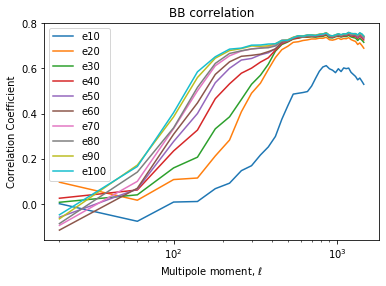

In [29]:
plot_corre(corr,model_maximum=100,polarization="BB ")
plt.savefig("../../../capstone_image/BB_correlation")

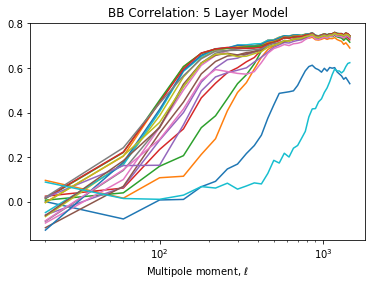

In [28]:
##plot_corr 
##optional argument for max number of models -- default as 100 
plot_corre(corr,model_maximum=200,Title="5 Layer Model",polarization="BB")

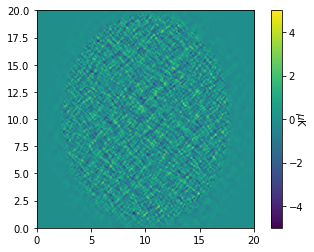

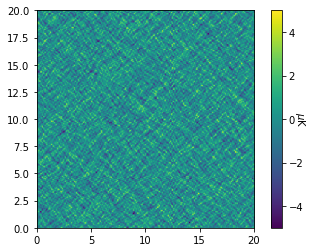

In [8]:
##plot_map compare outputs (prediction arrays) to truth maps,
##optional argument for vminx/vmax: color_range=(vmin,vmax) -- default as (-5,5) 
plot_map(pred[9,0,:,:,0])           ##pred (array): (model #,validation map,npix,npix,Q/U)
plot_map(valid_truth[0,:,:,0])      ##valid_turth (array): (validation map, npix,npix, Q/U)

In [17]:
def plot_map(Map,name,color_range=(-5,5),Title="",xlabel="",ylabel="",cbarlabel='$\mu$K'):
    fig = plt.figure()
    imgplot = plt.imshow(Map,extent=(0,20,0,20),vmin=color_range[0],vmax=color_range[1])
    plt.title(Title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cbar=plt.colorbar()
    cbar.ax.set_ylabel(cbarlabel,rotation=270)
    fp="../../../capstone_image/"
    plt.savefig(fp+name)

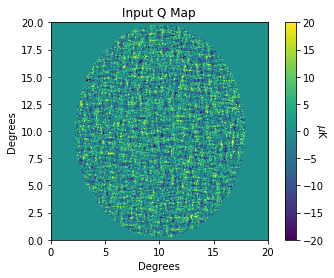

In [19]:
plot_map(inp[0,512:1024,512:1024,0],name="inputQ",color_range=(-20,20),Title="Input Q Map",xlabel='Degrees',ylabel='Degrees')

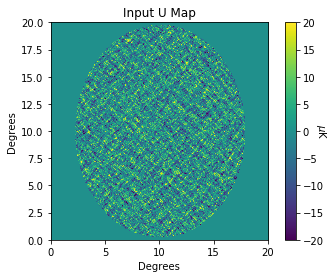

In [20]:
plot_map(inp[0,512:1024,512:1024,1],name="inputU",color_range=(-20,20),Title="Input U Map",xlabel='Degrees',ylabel='Degrees')

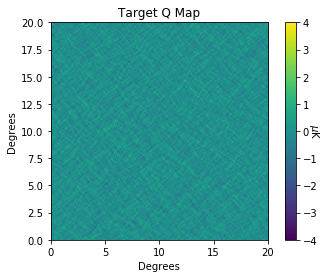

In [32]:
plot_map(truth[0,:,:,0],name="truthQ",color_range=(-4,4),Title="Target Q Map",xlabel='Degrees',ylabel='Degrees')

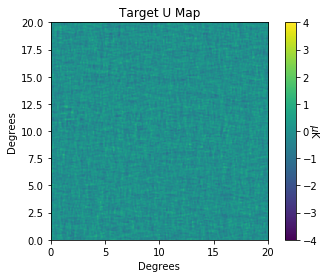

In [33]:
plot_map(truth[0,:,:,1],name="truthU",color_range=(-4,4),Title="Target U Map",xlabel='Degrees',ylabel='Degrees')

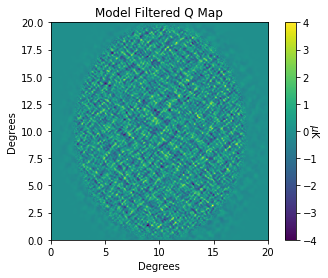

In [34]:
plot_map(pred[9,0,:,:,0],name="outputQ",color_range=(-4,4),Title="Model Filtered Q Map",xlabel='Degrees',ylabel='Degrees')

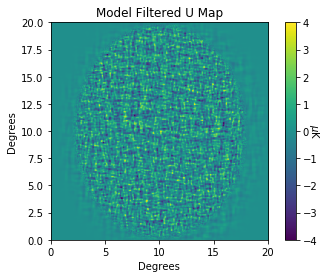

In [35]:
plot_map(pred[9,0,:,:,1],name="outputU",color_range=(-4,4),Title="Model Filtered U Map",xlabel='Degrees',ylabel='Degrees')

In [37]:
DlEE,DlBB,DlEB=power_loop(pred[9,:,:,:,:])

In [41]:
def plot_power(Dl,ell=0,Dl_true=0,Title=""):
    """
    plot_power(Dl,ell=0,Dl_true=0,Title="")
    
    Input: array, shape(37)
    """
    #defining x coordinate
    x=np.arange(0,1500,75)+20

    #plotting power spectra 
    plt.plot(x,Dl)
    plt.plot(ell,Dl_true)
    plt.xlabel('Multipole moment, $\ell$');
    plt.ylabel('$\ell (\ell+1) C_\ell / 2 \pi(\mu K^2)$')
    plt.title(Title)

In [47]:
DlBB_avg = np.mean(DlBB,axis=1)

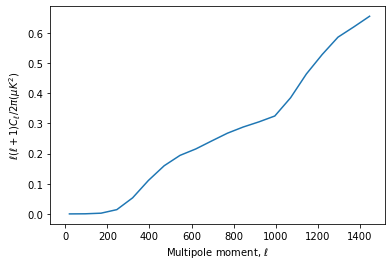

In [48]:
plot_power(DlBB_avg,)